# Regression Line Plotter

This code plots the regression line seperately for each site

Enter start date (YYYY-MM):  1985-01
Enter end date (YYYY-MM):  2022-12
Enter the number of sites to plot:  5


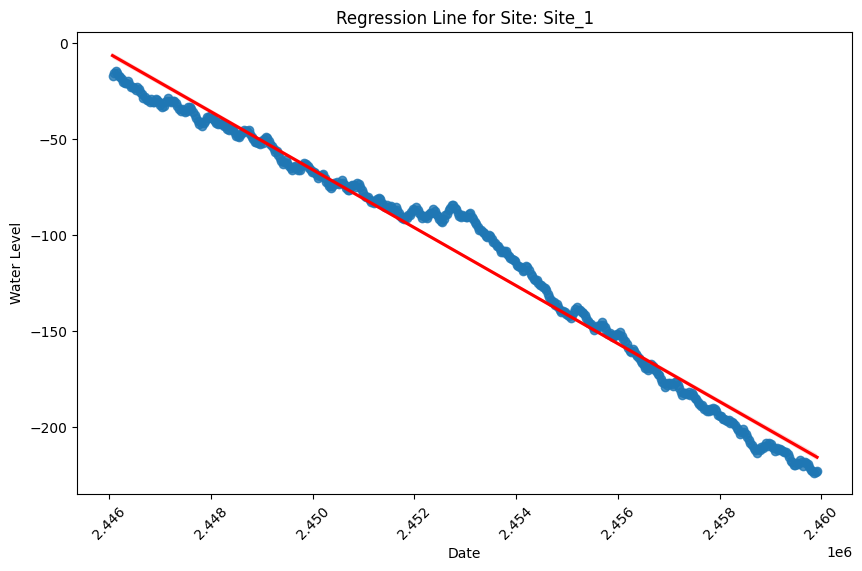

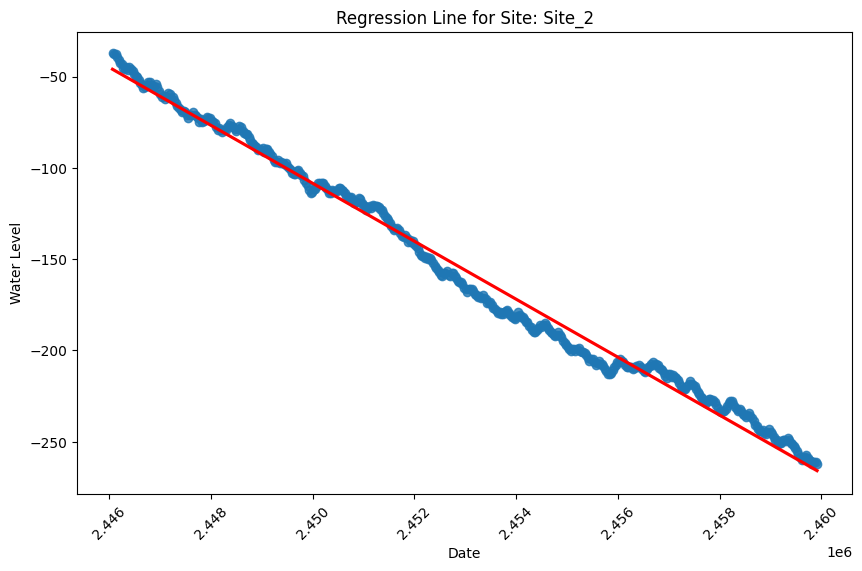

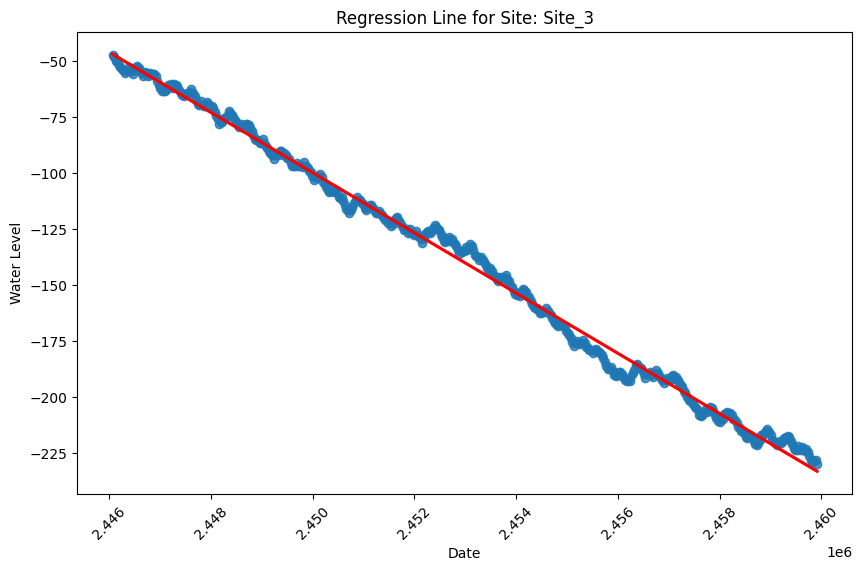

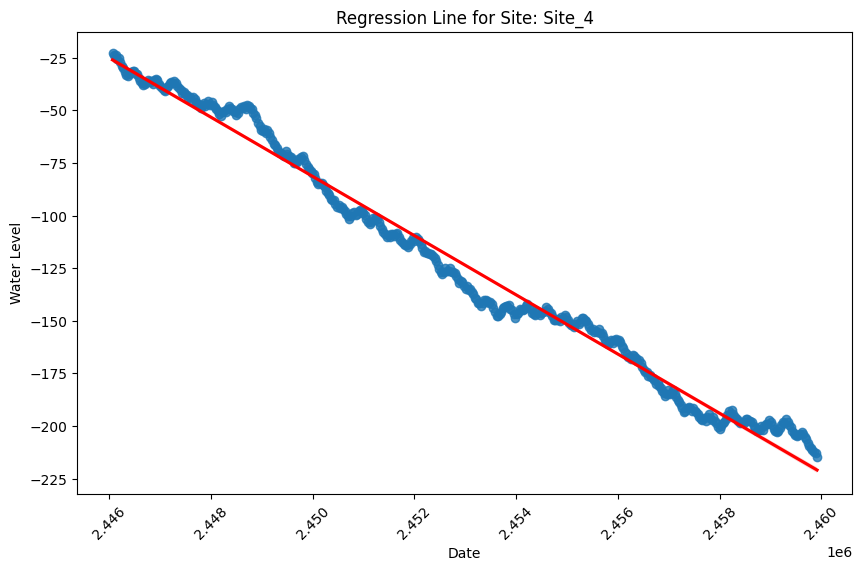

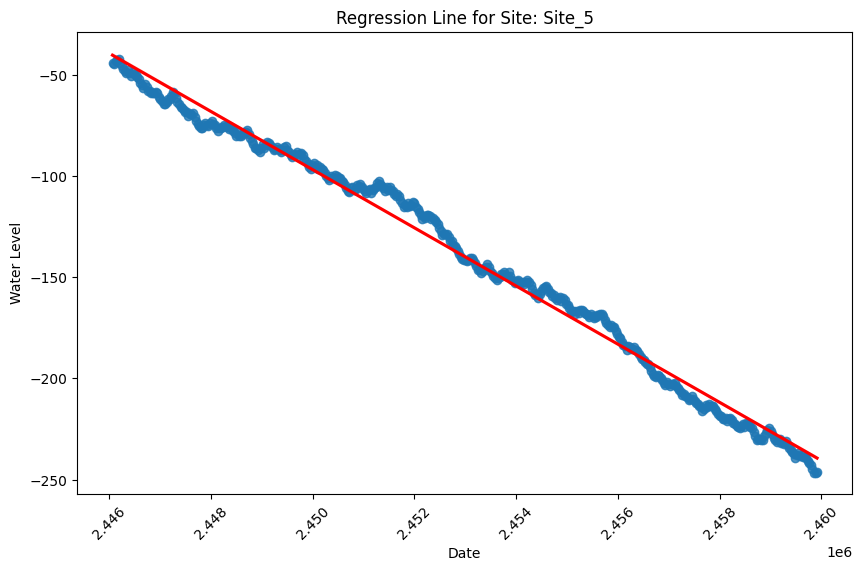

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Function to plot regression line for a specific site
def plot_regression_line(data, site_name):
    plt.figure(figsize=(10, 6))
    
    # Sort the data based on the 'date' column
    data = data.sort_values(by='date')
    
    # Convert 'date' column to numerical values
    data['date'] = data['date'].map(pd.Timestamp.to_julian_date)
    
    # Plot the regression line
    sns.regplot(x='date', y='level', data=data, line_kws={'color': 'red'})
    
    plt.title(f'Regression Line for Site: {site_name}')
    plt.xlabel('Date')
    plt.ylabel('Water Level')
    plt.xticks(rotation=45)
    plt.show()

# Get user input for the timeframe and number of sites to plot
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")
num_sites = int(input("Enter the number of sites to plot: "))

# Filter the data based on the user's timeframe selection
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Get unique site names and select the specified number of sites to plot
unique_sites = filtered_data['site'].unique()
sites_to_plot = unique_sites[:num_sites]

# Plot the regression lines for the selected sites
for site in sites_to_plot:
    site_data = filtered_data[filtered_data['site'] == site]
    plot_regression_line(site_data, site)


## All Trendlines together

Enter start date (YYYY-MM):  2000-01
Enter end date (YYYY-MM):  2010-12
Enter the number of sites to plot:  5


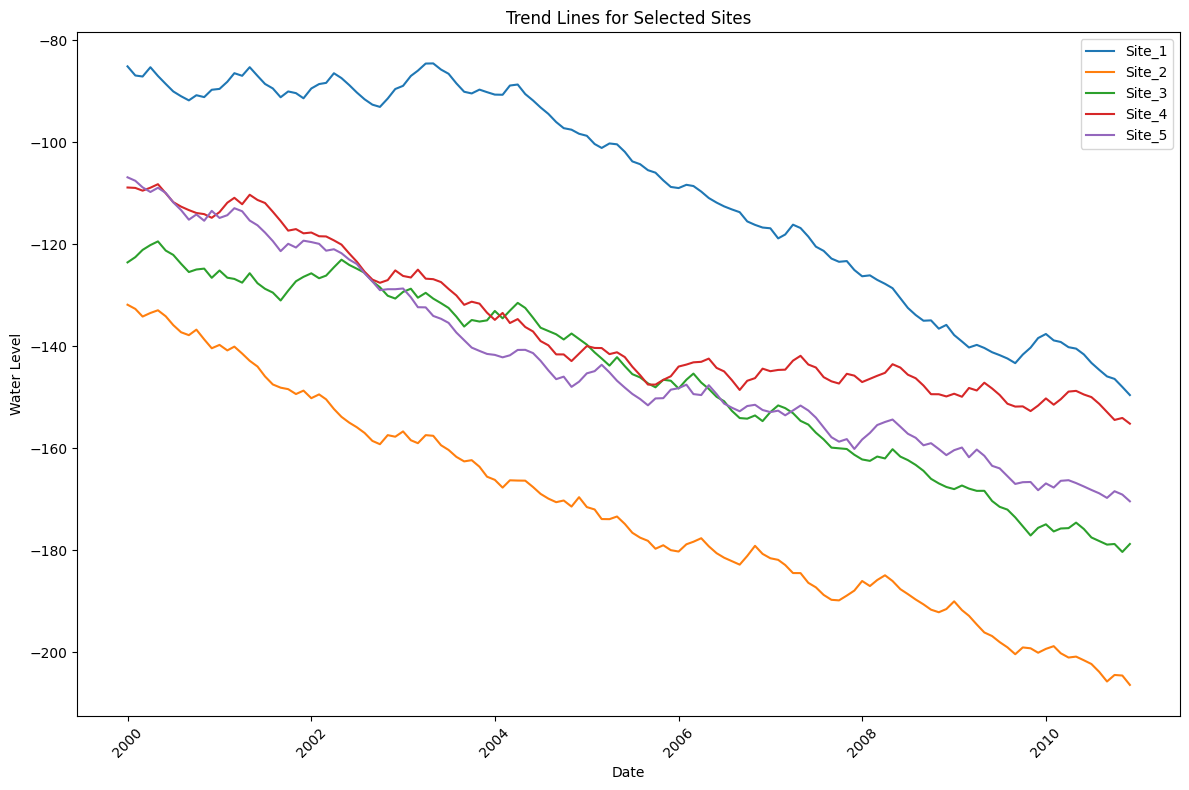

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Function to plot regression lines for selected sites on the same graph
def plot_regression_lines(data, sites):
    plt.figure(figsize=(12, 8))
    for site in sites:
        site_data = data[data['site'] == site]
        sns.lineplot(x='date', y='level', data=site_data, label=site)
    plt.title('Trend Lines for Selected Sites')
    plt.xlabel('Date')
    plt.ylabel('Water Level')
    plt.xticks(rotation=45)
    plt.legend().set_visible(True)  # Hide the legend False
    plt.tight_layout()
    plt.show()

# Get user input for the timeframe and number of sites to plot
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")
num_sites = int(input("Enter the number of sites to plot: "))

# Filter the data based on the user's timeframe selection
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Get unique site names and select the specified number of sites to plot
unique_sites = filtered_data['site'].unique()
sites_to_plot = unique_sites[:num_sites]

# Plot the regression lines for the selected sites on the same graph
plot_regression_lines(filtered_data, sites_to_plot)


## All Regression Lines Together (User Selected)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get user input for the timeframe and sites to plot
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")
selected_sites = input("Enter the sites you want to plot (separated by commas): ").split(",")

# Filter the data based on the user's timeframe selection
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Merge the data of selected sites into a single DataFrame
selected_data = filtered_data[filtered_data['site'].isin(selected_sites)]

# Plot the regression lines for the selected sites on the same graph
plt.figure(figsize=(12, 8))
for site in selected_sites:
    site_data = selected_data[selected_data['site'] == site]
    site_data = site_data.sort_values(by='date')
    x = np.arange(len(site_data))
    coeffs = np.polyfit(x, site_data['level'], deg=1)
    regression_line = np.polyval(coeffs, x)
    plt.plot(site_data['date'], regression_line, label=f'Regression Line for {site}', alpha=0.7)
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

plt.title('Regression Lines for Selected Sites')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
#plt.legend(loc='upper left', markerscale=2)
plt.tight_layout()
plt.show()


### Plot The Sites Together

How many sites do you want to plot (maximum 3200):  4
Enter start date (YYYY-MM):  2015-01
Enter end date (YYYY-MM):  2022-12


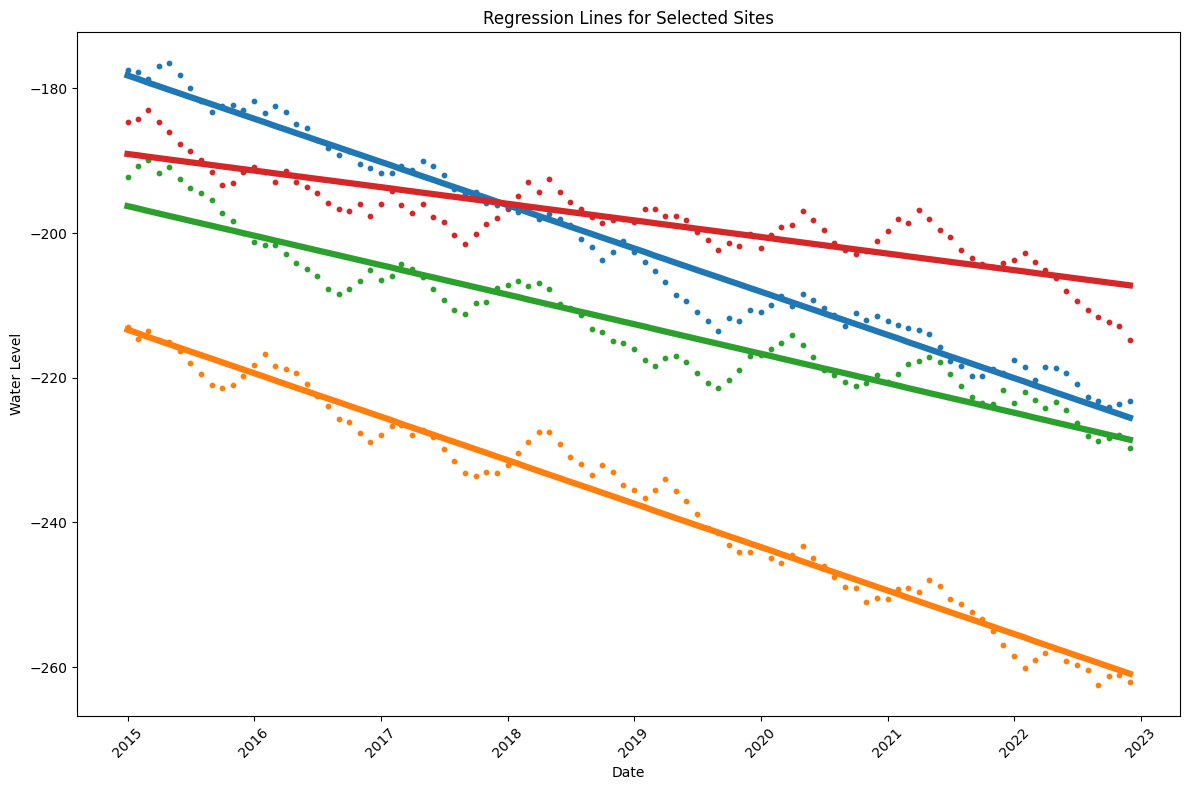

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get unique site names
unique_sites = df['site'].unique()

# Ask the user how many sites to plot
num_sites_to_plot = int(input(f"How many sites do you want to plot (maximum {len(unique_sites)}): "))
sites_to_plot = unique_sites[:num_sites_to_plot]

# Get user input for the date range to plot
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")

# Filter the data for the selected sites and date range
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
selected_data = df[(df['site'].isin(sites_to_plot)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Calculate regression lines for each site
plt.figure(figsize=(12, 8))
for site in sites_to_plot:
    site_data = selected_data[selected_data['site'] == site]
    site_data = site_data.sort_values(by='date')
    x = np.arange(len(site_data))
    coeffs = np.polyfit(x, site_data['level'], deg=1)
    regression_line = np.polyval(coeffs, x)
    plt.plot(site_data['date'], regression_line, label=f'Regression Line for {site}', linewidth=4.5)
    plt.scatter(site_data['date'], site_data['level'], s=10)  # Scatter plot for data points

plt.title('Regression Lines for Selected Sites')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
plt.legend().set_visible(False)  # Hide the legend
plt.tight_layout()
plt.show()


# Master Code for Plotting Regression and Saving Image

How many sites do you want to plot (maximum 3200):  5
Enter start date (YYYY-MM):  2010-12
Enter end date (YYYY-MM):  2022-12
Enter the width of the graph (in inches):  18
Enter the height of the graph (in inches):  10


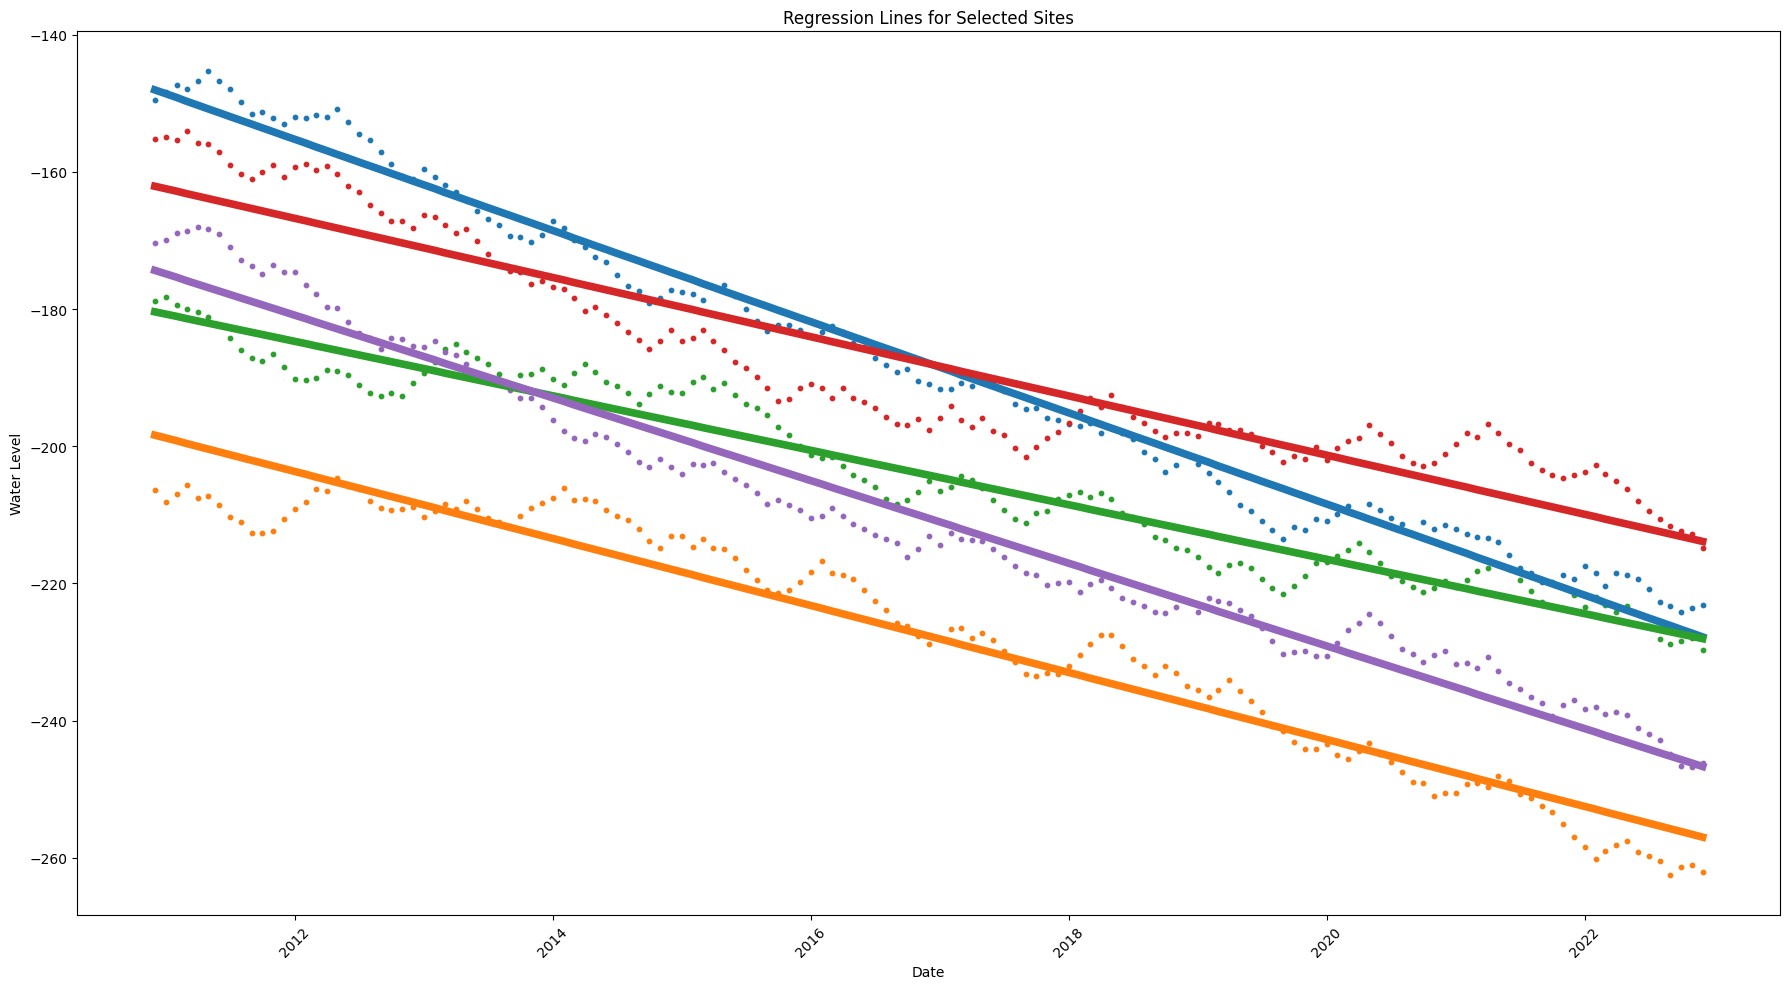

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get unique site names
unique_sites = df['site'].unique()

# Ask the user how many sites to plot
num_sites_to_plot = int(input(f"How many sites do you want to plot (maximum {len(unique_sites)}): "))
sites_to_plot = unique_sites[:num_sites_to_plot]

# Get user input for the date range to plot
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")

# Filter the data for the selected sites and date range
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
selected_data = df[(df['site'].isin(sites_to_plot)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Get user input for the dimensions of the graph
graph_width = float(input("Enter the width of the graph (in inches): "))
graph_height = float(input("Enter the height of the graph (in inches): "))

# Calculate regression lines for each site
plt.figure(figsize=(graph_width, graph_height))
for site in sites_to_plot:
    site_data = selected_data[selected_data['site'] == site]
    site_data = site_data.sort_values(by='date')
    x = np.arange(len(site_data))
    coeffs = np.polyfit(x, site_data['level'], deg=1)
    regression_line = np.polyval(coeffs, x)
    plt.plot(site_data['date'], regression_line, label=f'Regression Line for {site}', linewidth=5.5)
    plt.scatter(site_data['date'], site_data['level'], s=10)  # Scatter plot for data points

plt.title('Regression Lines for Selected Sites')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
plt.legend().set_visible(False)  # Hide the legend
plt.tight_layout()

# Save the plot as a PNG file in high resolution
plt.savefig('Graph.png', dpi=300)

plt.show()


## More Options

How many sites do you want to plot (maximum 3200):  5
Enter 'scatter' for scatter plot, 'line' for regression line, or 'both' for both:  both
Do you want to plot the legend? (yes or no):  no
Enter the width of the graph (in inches):  20
Enter the height of the graph (in inches):  10
Enter start date (YYYY-MM):  2022-01
Enter end date (YYYY-MM):  2022-12


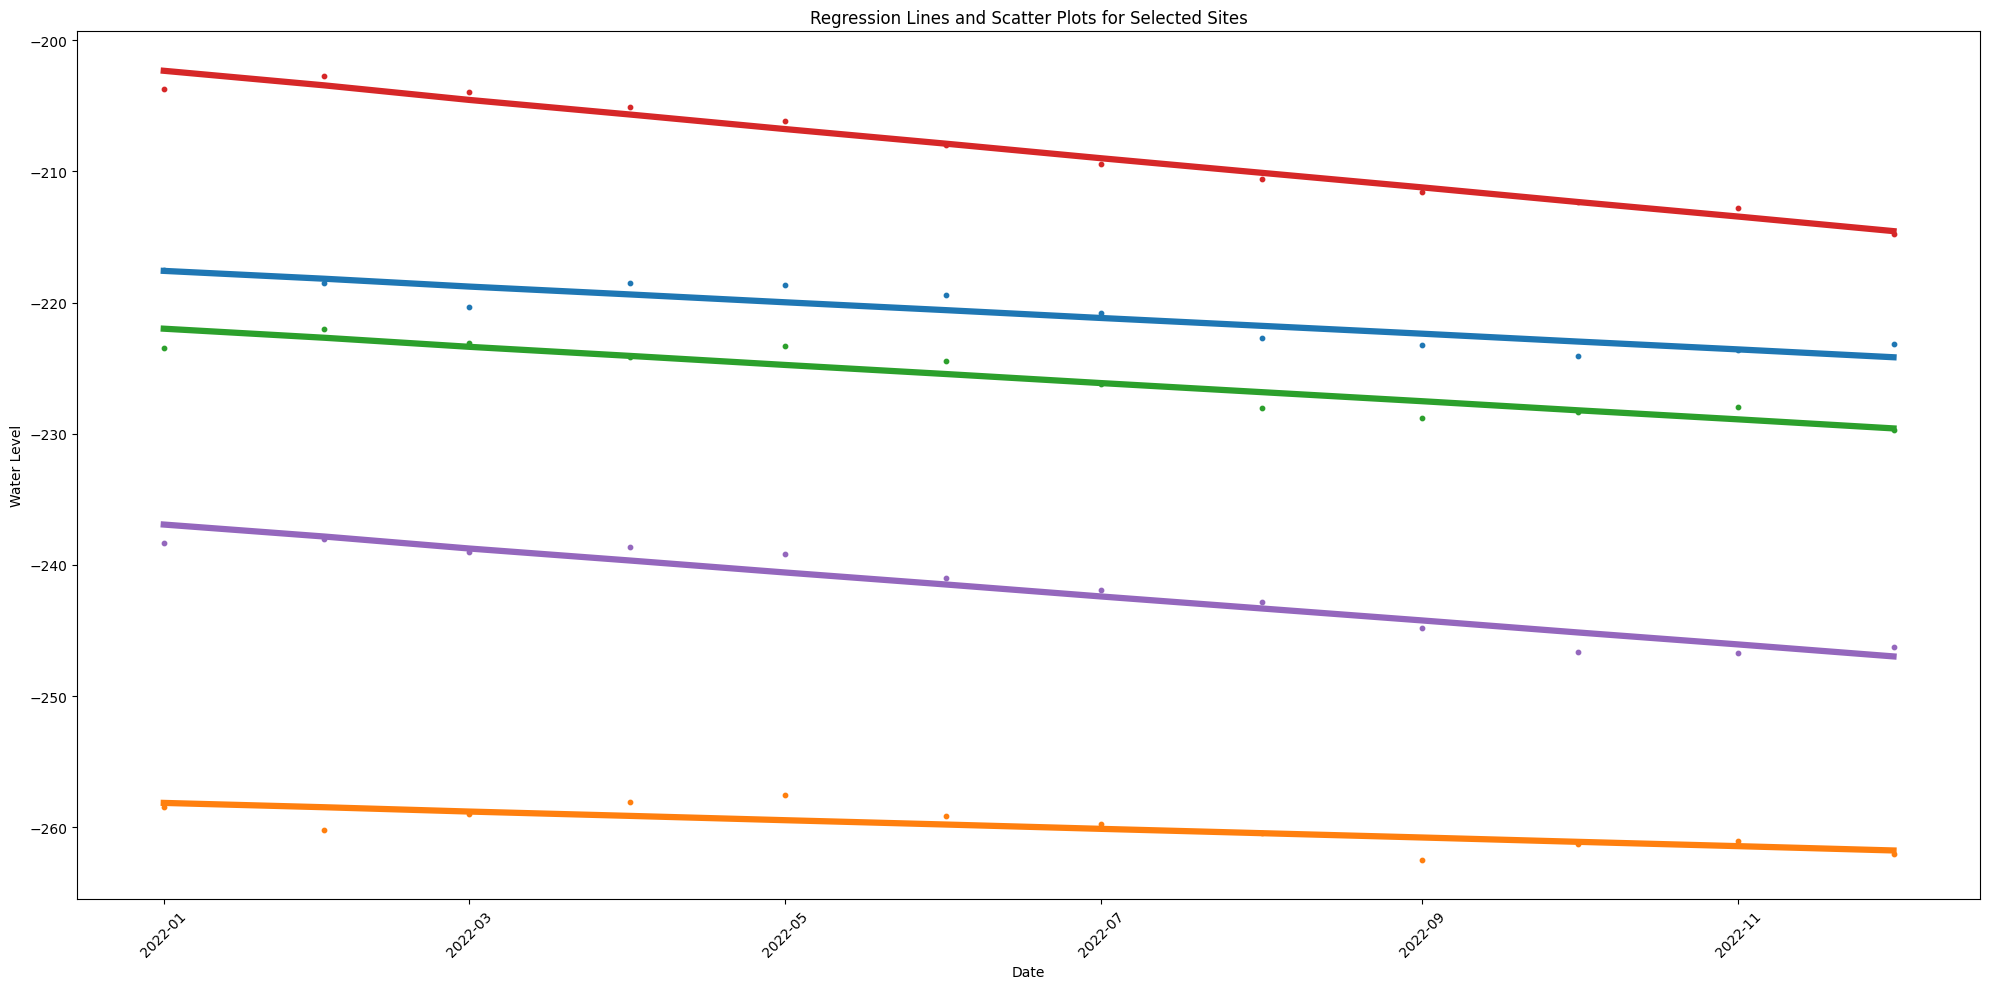

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get unique site names
unique_sites = df['site'].unique()

# Ask the user how many sites to plot
num_sites_to_plot = int(input(f"How many sites do you want to plot (maximum {len(unique_sites)}): "))
sites_to_plot = unique_sites[:num_sites_to_plot]

# Get user input for what to plot (scatter, regression line, or both)
plot_choice = input("Enter 'scatter' for scatter plot, 'line' for regression line, or 'both' for both: ")

# Ask the user if they want to plot the legend
legend_choice = input("Do you want to plot the legend? (yes or no): ")

# Get user input for the dimensions of the graph
graph_width = float(input("Enter the width of the graph (in inches): "))
graph_height = float(input("Enter the height of the graph (in inches): "))

# Filter the data for the selected sites and date range
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
selected_data = df[(df['site'].isin(sites_to_plot)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Calculate regression lines for each site
plt.figure(figsize=(graph_width, graph_height))
for site in sites_to_plot:
    site_data = selected_data[selected_data['site'] == site]
    site_data = site_data.sort_values(by='date')
    x = np.arange(len(site_data))
    coeffs = np.polyfit(x, site_data['level'], deg=1)
    regression_line = np.polyval(coeffs, x)
    
    if plot_choice.lower() == 'scatter' or plot_choice.lower() == 'both':
        plt.scatter(site_data['date'], site_data['level'], s=10, label=f'Scatter plot for {site}')
    if plot_choice.lower() == 'line' or plot_choice.lower() == 'both':
        plt.plot(site_data['date'], regression_line, label=f'Regression Line for {site}', linewidth=4.5)

if legend_choice.lower() == 'no':
    plt.legend().set_visible(False)  # Hide the legend

plt.title('Regression Lines and Scatter Plots for Selected Sites')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file in high resolution
plt.savefig('Graph.png', dpi=300)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a pandas DataFrame
file_path = 'groundwater_timeseries_data_Negative.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get unique site names
unique_sites = df['site'].unique()

# Ask the user how many sites to plot
num_sites_to_plot = int(input(f"How many sites do you want to plot (maximum {len(unique_sites)}): "))
sites_to_plot = unique_sites[:num_sites_to_plot]

# Get user input for what to plot (scatter, regression line, or both)
plot_choice = input("Enter 'scatter' for scatter plot, 'line' for regression line, or 'both' for both: ")

# Ask the user if they want to plot the legend
legend_choice = input("Do you want to plot the legend? (yes or no): ")

# Get user input for the dimensions of the graph
graph_width = float(input("Enter the width of the graph (in inches): "))
graph_height = float(input("Enter the height of the graph (in inches): "))

# Filter the data for the selected sites and date range
start_date_input = input("Enter start date (YYYY-MM): ")
end_date_input = input("Enter end date (YYYY-MM): ")
start_date = pd.to_datetime(start_date_input)
end_date = pd.to_datetime(end_date_input)
selected_data = df[(df['site'].isin(sites_to_plot)) & (df['date'] >= start_date) & (df['date'] <= end_date)]

# Calculate regression lines for each site
plt.figure(figsize=(graph_width, graph_height))
for site in sites_to_plot:
    site_data = selected_data[selected_data['site'] == site]
    site_data = site_data.sort_values(by='date')
    x = np.arange(len(site_data))
    coeffs = np.polyfit(x, site_data['level'], deg=1)
    regression_line = np.polyval(coeffs, x)
    
    if plot_choice.lower() == 'scatter' or plot_choice.lower() == 'both':
        # Add the 'label' parameter to specify the label for the scatter plot
        plt.scatter(site_data['date'], site_data['level'], s=10, label=f'Scatter plot for {site}')
    if plot_choice.lower() == 'line' or plot_choice.lower() == 'both':
        plt.plot(site_data['date'], regression_line, label=f'Regression Line for {site}', linewidth=4.5)

if legend_choice.lower() == 'no':
    plt.legend().set_visible(False)  # Hide the legend
elif legend_choice.lower() == 'yes' and len(sites_to_plot) > 10:
    print("It is recommended to save the legend separately to avoid overcrowding the plot.")
    legend_choice = input("Do you want to save the legend separately? (yes or no): ")
    if legend_choice.lower() == 'yes':
        # Save the legend separately as "Graph_legend.png"
        fig_leg = plt.figure(figsize=(1, 1))  # Create a separate figure for the legend
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
        ax_leg.axis('off')
        fig_leg.savefig('Graph_legend.png', bbox_inches='tight', dpi=300)
        plt.legend().set_visible(False)  # Hide the legend in the main plot

plt.title('Regression Lines and Scatter Plots for Selected Sites')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file in high resolution
plt.savefig('Graph.png', dpi=300)

# Display the plot
plt.show()


How many sites do you want to plot (maximum 3200):  3200
Enter 'scatter' for scatter plot, 'line' for regression line, or 'both' for both:  line
Do you want to plot the legend? (yes or no):  yes
Enter the width of the graph (in inches):  50
Enter the height of the graph (in inches):  20
Enter start date (YYYY-MM):  2000-01
Enter end date (YYYY-MM):  2020-12


It is recommended to save the legend separately to avoid overcrowding the plot.
